<a href="https://colab.research.google.com/github/fcojquesada/Linear-Regression-Pyhton-Colab/blob/main/Practice_Multivariable_Regression_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sn.set()


In [6]:
raw_data = pd.read_csv('1.03. Dummies.csv')
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [11]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [12]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


##Regression

In [14]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.19e-15
Time:                        16:38:35   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
## R-squared is much better than the simple linear Regression with only SAT variable
## All the p-values for each coefficient is < 0.05 therefore these coeficients are significally important for the model
## Also F-statistic is higher which means that is more explanatory and significant
#The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis

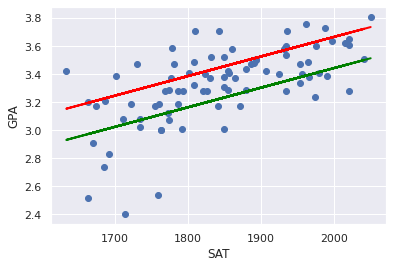

In [21]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='red')
plt.ylabel('GPA')
plt.xlabel('SAT')
plt.show()

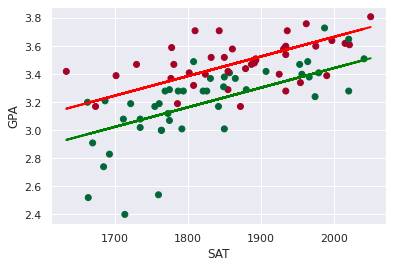

In [22]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='red')
plt.ylabel('GPA')
plt.xlabel('SAT')
plt.show()

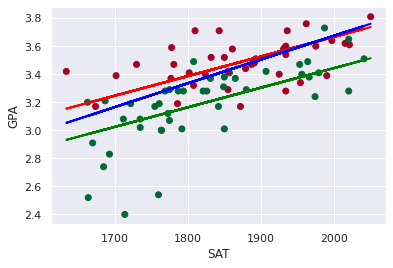

In [25]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
y_hat = 0.275 + 0.0017 * data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='red')
fig = plt.plot(data['SAT'], y_hat, lw=2, c='blue')
plt.ylabel('GPA')
plt.xlabel('SAT')
plt.show()

In [26]:
## Almost the first regression line is between the two regression line from the Attendance